# Plots the controller over time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
%matplotlib widget

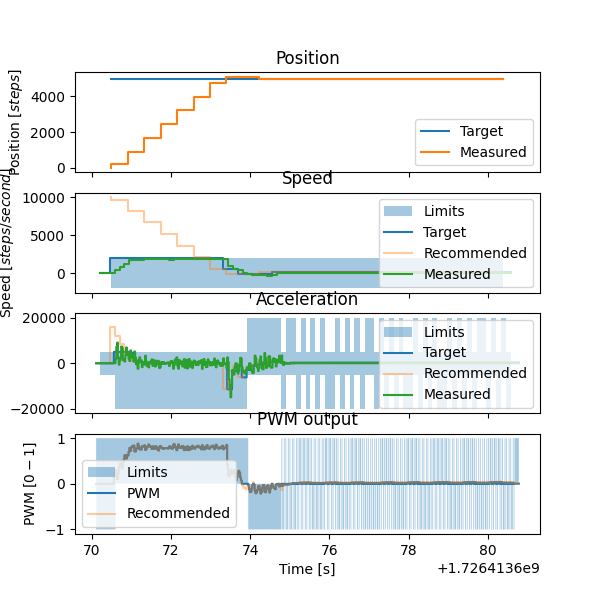

In [38]:
# Load data
log_dir = "test"
accel_df = pd.read_csv(f"{log_dir}/acceleration.csv")
speed_df = pd.read_csv(f"{log_dir}/speed.csv")
pos_df = pd.read_csv(f"{log_dir}/position.csv")


plt.close()
fig = plt.figure(figsize=[6,6])
# gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1])
# (ax_speed, ax_accel_windup), (ax_accel, ax_speed_windup), (ax_pwm, ax_pwm_windup) = gs.subplots(sharex=True)
gs = fig.add_gridspec(4, height_ratios=[1, 1, 1, 1])
ax_position, ax_speed, ax_accel, ax_pwm = gs.subplots(sharex=True)

# Plot pwm
ax_pwm.fill_between(accel_df["Timestamp [s]"].values, accel_df["Limit Min"].values, accel_df["Limit Max"].values, step="pre", alpha=0.4, label="Limits")
ax_pwm.step(accel_df["Timestamp [s]"].values, accel_df["Output"].values, label="PWM")
ax_pwm.step(accel_df["Timestamp [s]"].values, accel_df["Last Windup"].values + accel_df["Output"].values, alpha=0.4, label="Recommended")
# ax_pwm.step(accel_df["Timestamp [s]"].values, accel_df["Windup"].values, alpha=0.4, label="Windup")
ax_pwm.set_title("PWM output")
ax_pwm.set_ylabel("PWM [$0-1$]")
ax_pwm.set_xlabel("Time [s]")
ax_pwm.legend()
# ax_pwm.set_ylim((0,1))

# Plot acceleration
ax_accel.fill_between(speed_df["Timestamp [s]"].values, speed_df["Limit Min"].values, speed_df["Limit Max"].values, step="pre", alpha=0.4, label="Limits")
ax_accel.step(accel_df["Timestamp [s]"].values, accel_df["Target"].values, label="Target")
ax_accel.step(speed_df["Timestamp [s]"].values, speed_df["Last Windup"].values + speed_df["Output"].values, alpha=0.4, label="Recommended")
ax_accel.step(accel_df["Timestamp [s]"].values, accel_df["Current"].values, label="Measured")
ax_accel.set_title("Acceleration")
ax_accel.set_ylabel("Acceleration [$steps / second^2$]")
ax_accel.legend()

# Plot speed
ax_speed.fill_between(pos_df["Timestamp [s]"].values, pos_df["Limit Min"].values, pos_df["Limit Max"].values, step="pre", alpha=0.4, label="Limits")
ax_speed.step(speed_df["Timestamp [s]"].values, speed_df["Target"].values, label="Target")
ax_speed.step(pos_df["Timestamp [s]"].values, pos_df["Last Windup"].values + pos_df["Output"].values, alpha=0.4, label="Recommended")
ax_speed.step(speed_df["Timestamp [s]"].values, speed_df["Current"].values, label="Measured")
ax_speed.set_title("Speed")
ax_speed.set_ylabel("Speed [$steps / second$]")
ax_speed.legend()

# Plot position
ax_position.step(pos_df["Timestamp [s]"].values, pos_df["Target"].values, label="Target")
ax_position.step(pos_df["Timestamp [s]"].values, pos_df["Current"].values, label="Measured")
ax_position.set_title("Position")
ax_position.set_ylabel("Position [$steps$]")
ax_position.legend()

plt.show()